In [1]:
# importing necessary libraries
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# reading the dataset
data = pd.read_csv('https://raw.githubusercontent.com/ruiwu1990/CSCI_4120/master/KNN/iris.data', header = None)

In [3]:
# displaying top 5 rows of the dataset
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# splitting the dataset into features, X and labels, y
X = data.iloc[:, :4]
y = data.iloc[:, 4]

In [5]:
avg_test_accuracies = [] # list to keep track of all the test accuracies for every value of k from 1 to 20 (both inclusive)
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors = k) # instantiating the KNN Model
    
    cross_val_results = cross_validate(estimator = model, 
                                       X = X, 
                                       y = y,
                                       scoring = 'accuracy', 
                                       cv = 5) # performing KNN 5 times by 5-Fold Cross Validation
    
    avg_test_accuracy = cross_val_results['test_score'].mean() # calculating the average test accuracy for each value of k
    print('Average Test Accuracy of KNN Model for k = ' + str(k) + ' :', avg_test_accuracy)
    avg_test_accuracies.append(avg_test_accuracy)

Average Test Accuracy of KNN Model for k = 1 : 0.96
Average Test Accuracy of KNN Model for k = 2 : 0.9466666666666665
Average Test Accuracy of KNN Model for k = 3 : 0.9666666666666668
Average Test Accuracy of KNN Model for k = 4 : 0.9733333333333334
Average Test Accuracy of KNN Model for k = 5 : 0.9733333333333334
Average Test Accuracy of KNN Model for k = 6 : 0.9800000000000001
Average Test Accuracy of KNN Model for k = 7 : 0.9800000000000001
Average Test Accuracy of KNN Model for k = 8 : 0.9666666666666668
Average Test Accuracy of KNN Model for k = 9 : 0.9733333333333334
Average Test Accuracy of KNN Model for k = 10 : 0.9800000000000001
Average Test Accuracy of KNN Model for k = 11 : 0.9800000000000001
Average Test Accuracy of KNN Model for k = 12 : 0.9800000000000001
Average Test Accuracy of KNN Model for k = 13 : 0.9733333333333334
Average Test Accuracy of KNN Model for k = 14 : 0.9666666666666666
Average Test Accuracy of KNN Model for k = 15 : 0.9666666666666668
Average Test Accur

In [6]:
best_k = avg_test_accuracies.index(max(avg_test_accuracies)) + 1 # finding the least value of k yielding highest test accuracy
print('Best value of k i.e., least value of k yielding highest test accuracy: ', best_k)

Best value of k i.e., least value of k yielding highest test accuracy:  6


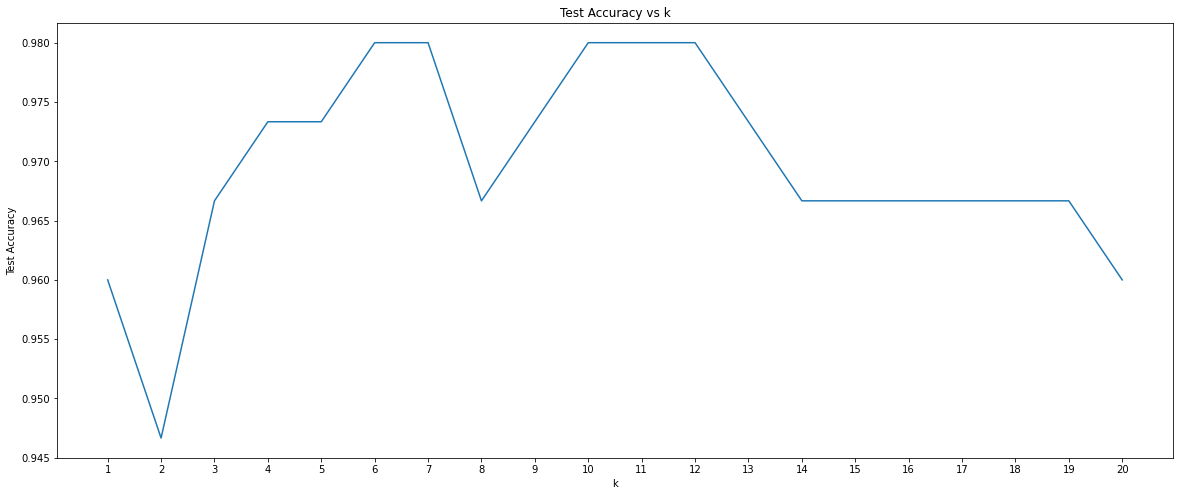

In [7]:
# line chart showing the Test Accuracy vs k plot
plt.figure(figsize = (20, 8))
k_values = [k for k in range(1, 21)]
plt.plot(k_values, avg_test_accuracies)
plt.xticks(k_values)
plt.xlabel('k')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs k')
plt.show()